# Modelowanie wieloagentowe - Report

### Introduction

The main goal of this report is to implement an algorithm which will help an agent to reach the required target in the given environment, and study how different parameters of the algorithm will affect agent's ability to learn. In this report the environment for which an agent will be trained is **"MountainCar-v0"** from OpenAI Gym library. To train an agent for this environment **Q-learning approach** was chosen. "MountainCar-v0" environment will be described below.

#### Environment

On OpenAI website the description of this environment looks like this:

> A car is on a one-dimensional track, positioned between two “mountains”. The goal is to drive up the mountain on the right; however, the car’s engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.

There are two dimensions for possible states:

    Num    Observation               Min            Max
    0      Car Position              -1.2           0.6
    1      Car Velocity              -0.07          0.07


The agent can choose one of the following actions:

    Num    Action
    0      Accelerate to the Left
    1      Don't accelerate
    2      Accelerate to the Right
                
Possible rewards agent can recieve for his actions look like this:

    Reward of 0 is awarded if the agent reached the flag (position = 0.5) on top of the mountain
    Reward of -1 is awarded if the position of the agent is less than 0.5

This means that, unless the can figure out a way to ascend the mountain in less than 200 moves, it will always achieve a total reward of -200 units.

From the environment description, this is the starting points for our agent:

    The position of the car is assigned a uniform random value in [-0.6 , -0.4]
    The velocity of the car is always assigned to 0
        
There are two main conditions for ending an episode:

    The car position is more than 0.5
    Episode length is greater than 200

#### Algorithm 

To train an agent in this environment Q-learning algorithm was chosen. This algorithm looks like this:

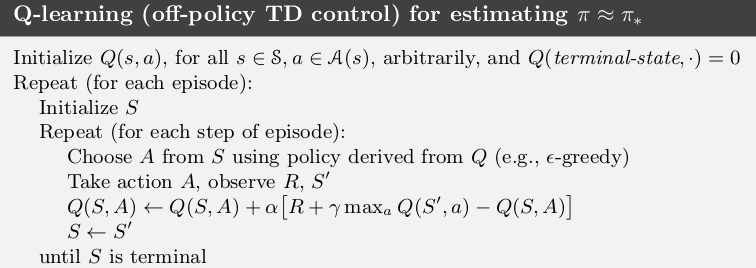

this is how formula for updating q-table looks like:

The main problem with this particular environment is that it has a continuous state space (Car Position from -1.2 to 0.6 and Car Velocity from -0.07 to 0.07). One approach to deal with it is to use Deep Reinforcement Learning algorithms, but an alternative approach is to simply discretize the state space and train an agent using Q-learning algorithm, as previously planned before. Here, the discretization was performed using 0.1 step for first element (Position) from state vector and 0.01 step for the second element (Velocity), but those values can be changed if needed. 

Another important thing for this environment is that the only way to impove final reward for an agent is to find a way to climb the hill. This can be problematic if the algorithm used for training has limited state exploration alibility. 

### Implementation 

importing libraries:

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

Сreating an agent for the environment exploration as a class:

In [2]:
class Agent:
    def __init__(self, env, learning_rate = 0.5, epsilon = 0.8, epsilon_decay = 0.995, discount = 0.99): #default values for some parameters are here
        self.positionLimit = np.array([env.observation_space.low[0], env.observation_space.high[0]])
        self.velocityLimit = np.array([env.observation_space.low[1], env.observation_space.high[1]])
        self.positionStep = 0.1
        self.velocityStep = 0.01
        
        # discretization of states
        self.positionSpace = np.arange(self.positionLimit[0], self.positionLimit[1], self.positionStep).round(2)
        self.velocitySpace = np.arange(self.velocityLimit[0], self.velocityLimit[1], self.velocityStep).round(2)
        
        # initialization of q-table (with zeros or numbers from unifirm distr)
        self.Q = np.zeros(shape = (len(self.positionSpace), len(self.velocitySpace), 3), dtype = np.float32)
        #self.Q = np.random.uniform(low = -1, high = 1, 
        #                  size = (len(self.positionSpace), len(self.velocitySpace), 
        #                          env.action_space.n))
        
        self.first_state = np.array((0, 0))
        self.second_state = np.array((0, 0))
        self.reward = 0
        self.cumulated_reward = 0
        self.reward_history = []
        self.ave_reward_list = []
        self.learning_rate = learning_rate
        self.discount = discount
        
        #epsilon params
        self.epsilon_default = epsilon
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        
        
    # reset an agent in needed 
    def reset(self, env):
        self.__init__(env)
    
    # get current parameters of the agent 
    def get_params(self):
        return print('Learning rate: {}, Epsilon: {}, Epsilon decay: {}, Discount: {}'.format(self.learning_rate, self.epsilon_default, self.epsilon_decay, self.discount))

This funciton takes as input current state of an agent and returns an index for the state in discrete state space:

In [3]:
def GetIndex(state, agent):
        index = (state - env.observation_space.low) // np.array((agent.positionStep, agent.velocityStep))
        return index.astype(int)

The function below returns an action for the agent based on current epsilon. This helps our agent to explore the state space more actively if epsilon is high enough or take the best action based on Q-table at a later stage of training.

In [4]:
def EpsGreedy(epsilon, agent):
    if np.random.random() < 1 - epsilon:
        action = np.argmax(agent.Q[first_position[0], first_position[1]]) 
    else:
        action = np.random.randint(0, 3)
    return action

Creating environment and an agent:

In [5]:
env = gym.make('MountainCar-v0')
env.reset()

array([-0.54700053,  0.        ])

Running algorithm below:

In [23]:
agent_1 = Agent(env)
agent_1.reset(env)

episodes = 2000
reward_list = []



# Compute reduction rate for epsilon
reduction = (agent_1.epsilon - 0) / episodes 
    
    
# Run Q learning algorithm
for i in tqdm(range(episodes)):

    # Initialize parameters
    finish = False
    agent_1.cumulated_reward, agent_1.reward = 0, 0
    agent_1.first_state = env.reset()
        
    # Discretize first state
    first_position = GetIndex(agent_1.first_state, agent_1)

    #run env until terminated
    while finish != True:
        
        # Render environment for last episodes
        if i >= (episodes - 5):
            env.render()              
        
        #  Next action - epsilon greedy strategy
        action = EpsGreedy(agent_1.epsilon, agent_1)
                
        # Get next state and reward
        agent_1.second_state, agent_1.reward, finish, info = env.step(action) 
            
        # Discretize second state
        second_position = GetIndex(agent_1.second_state, agent_1)
        
        # update Q value for current state
        if finish and agent_1.second_state[0] >= 0.5:
            delta = agent_1.learning_rate*(agent_1.reward - agent_1.Q[first_position[0], first_position[1], action])
            agent_1.Q[first_position[0], first_position[1],action] += delta
        else:
            delta = agent_1.learning_rate*(agent_1.reward + agent_1.discount * 
                    np.max(agent_1.Q[second_position[0], second_position[1]]) - 
                    agent_1.Q[first_position[0], first_position[1],action])
            agent_1.Q[first_position[0], first_position[1],action] += delta
                                     
        # Update variables
        agent_1.cumulated_reward += agent_1.reward
        first_position = second_position
            
    # Adjust epsilon for the next episode (there are to ways to reduce it in this notebook)
    agent_1.epsilon = max(0.0, agent_1.epsilon * agent_1.epsilon_decay)
    #agent_1.epsilon = max(0.0, agent_1.epsilon - reduction)
      
    # Track rewards
    agent_1.reward_history.append(agent_1.cumulated_reward)
    reward_list.append(agent_1.cumulated_reward)
        
    if (i+1) % 100 == 0:
        ave_reward = np.mean(reward_list)
        agent_1.ave_reward_list.append(ave_reward)
        reward_list = []
            
env.close()

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:31<00:00,  2.54it/s]


### Analysis

In code above there are 2 ways to control epsilon during agent's training (for each episode):

* Epsilon * EpsilonDecay (where default parameters are: Epsilon = 0.8, EpsilonDecay = 0.995)
* Epsilon - Reduction (where Reduction = Epsilon / number of training episodes)


Epsilon directly controls how much exploration our agent will have during training process. On graphs below default approach to handle epsilon will be the second one

Plotting results of the algorithm with default params and 5000 episodes:

In [7]:
agent_1.get_params()

Learning rate: 0.5, Epsilon: 0.8, Epsilon decay: 0.995, Discount: 0.99


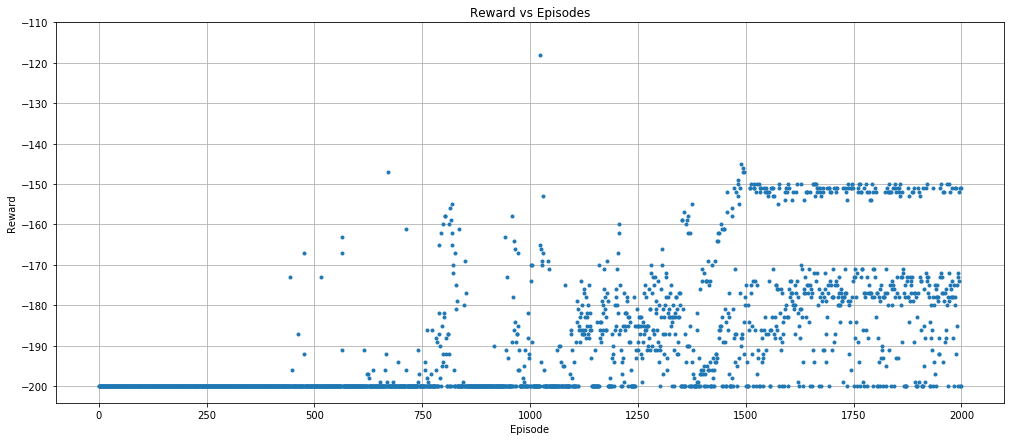

In [21]:
plt.figure(figsize = (17,7))
plt.plot(agent_1.reward_history, '.')
plt.yticks(range(-110, -210, -10))
plt.ylabel("Reward")
plt.xlabel("Episode")
plt.title('Reward vs Episodes')
plt.grid()
plt.savefig('rewards.jpg') 

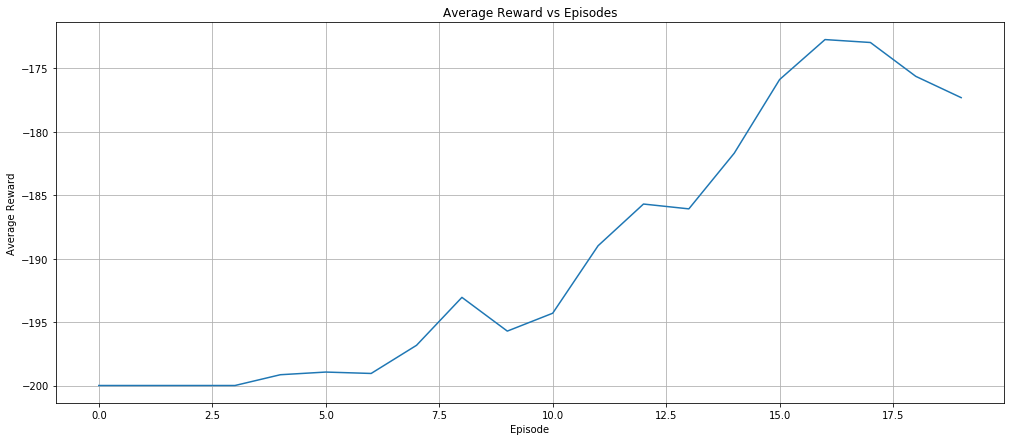

In [22]:
plt.figure(figsize = (17,7))
plt.plot(agent_1.ave_reward_list)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.grid()
plt.savefig('average rewards.jpg')     

As we can see above because of the way epsilon for this algorithm works, for the most of the episodes score equals  -200. It is due to the fact that the chance of random actions is very high and our agent explores state space. But closer to the end of the training process we can see, that agent starts to use his "knowledge" to improve his score significantly.

Below different parameters for learning rate, starting epsilon and discount rate will be evaluated:

#### Learning rate

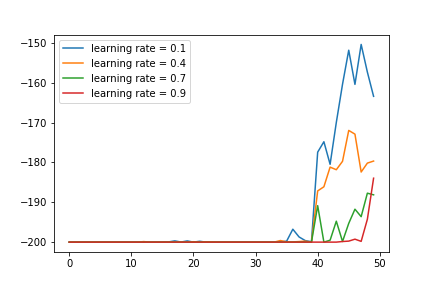

On the graph above we can clearly see, that learning rate has a huge impact on agent's ability to learn. For learning rate 0.1 agent has significantly higher scores if we compare it to learning rate = 0.9 (or 0.7)  

#### Epsilon

Starting epsilon controls how much our agent will be able to take random actions adn explore states to find better solutions 

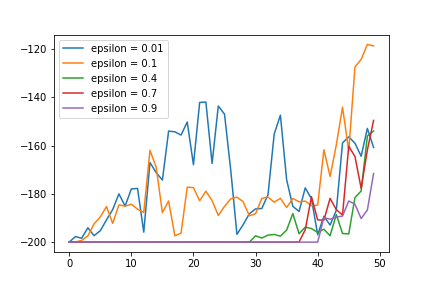
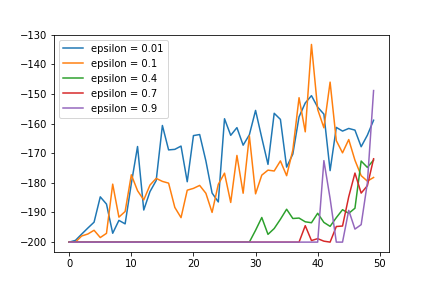


On the graphs above we can see two different training processes for the same epsilons.

We can see that for epsilon = 0.01 and 0.1 agent does not explore environment as actively as agents with high epsilon (0.7, 0.9). But even with small epsilons agent can find good solutions on early stages of training and show great results, howewer agents with high epsilons have more stable results. 

#### Discount factor

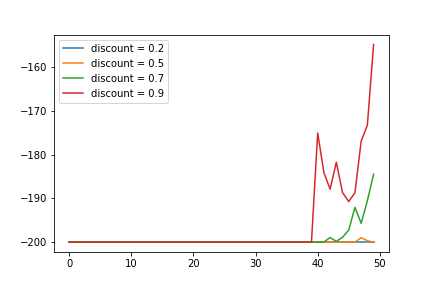

It is obvious from graph above, that low discount factors have nagative impact on agent's performance. Agent can't generate a Q-table and achieve any results because with low discount factors formula for updating Q-table does not make much sense.

#### Results for different epsilon strategies

strategy for the change in epsilon for each episode: Epsilon * Epsilon decay (where default parameters are: Epsilon = 0.8, Epsilondecay = 0.995)

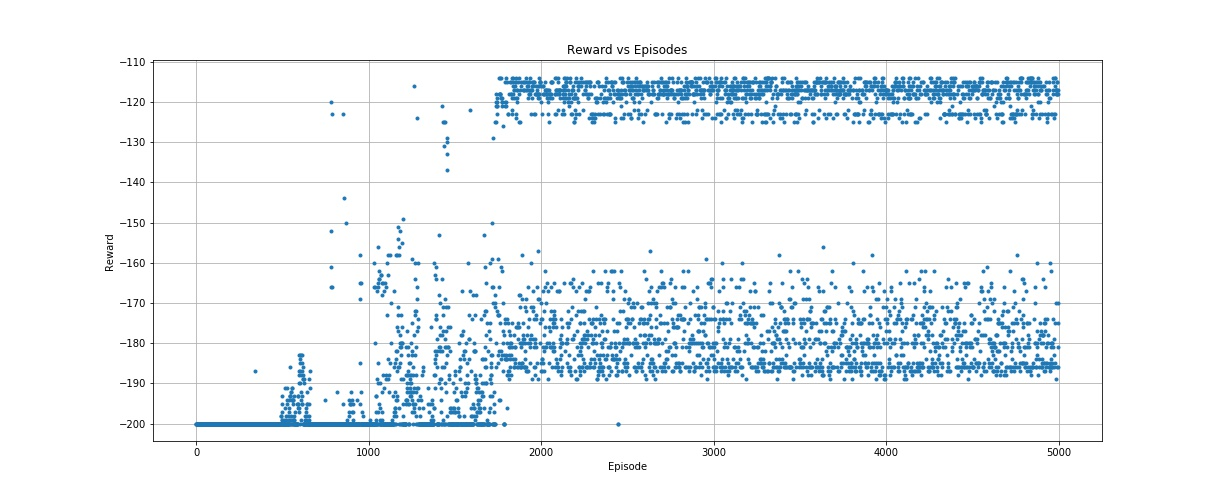

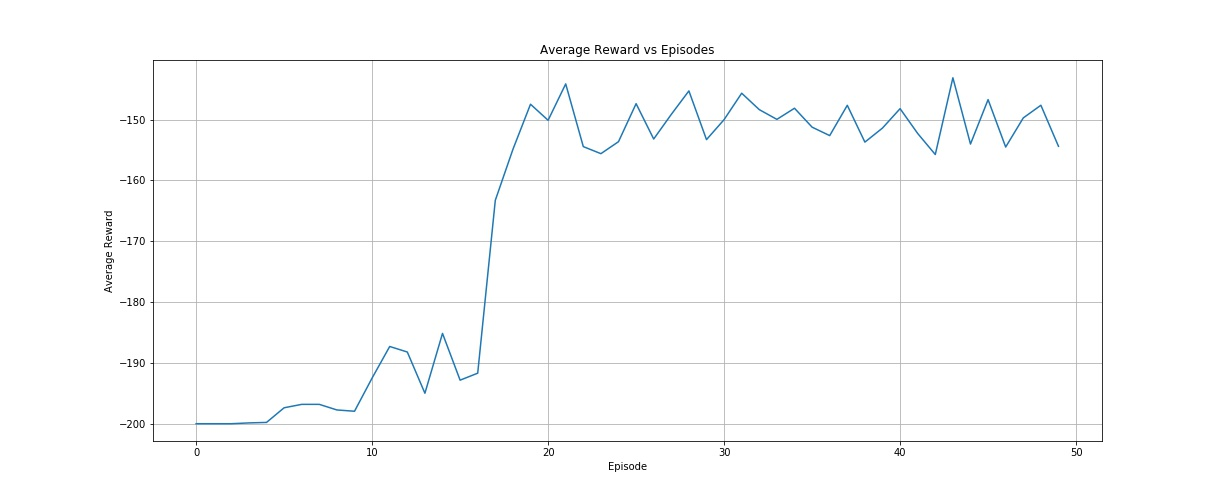

Here we can see that this strategy for epsilon control works quite good, as well as the default one. Epsilon reduction process is faster here and that is why agent shows high performance earlier and after this picks the best strategy for the rest of the training process. It is worth noting that while using the best strategy trained agent never loses any game and a lot of the times has a score close to -120 (see the first figure). This reward is very high for this environment.

### Summary

To summurize Q-learning algorithm successfully helps an agent to reach the goal and sometimes gives high scores for the agent. The main requirement for algorithm to work is to make state space discrete.

Parameters of the algorithm significantly affect agent's performance. High learning rate or low discount factor do not allow the agent to find a solution and improve the result. Epsilon reduction technique also greatly affects the learning speed and agent final results.